## OpenCV 기본 연산

In [2]:
import cv2
import numpy as np

* 영상 연산(GrayScale)

In [20]:
src1 = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
src2 = np.zeros(shape=src1.shape, dtype=np.uint8) + 50

dst = cv2.add(src1, src2)

# dst = src + 50

In [21]:
cv2.imshow('src1', src1)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

* 영상 연산(Color)

In [22]:
src1 = cv2.imread('./data/lena.jpg')
src2 = np.zeros(shape=src1.shape, dtype=np.uint8) + 50

dst = cv2.add(src1, src2)

In [23]:
cv2.imshow('src1', src1)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

* 영상 연산(비트 연산)

* 같은 결과<br>
cv2.THRESH_BINARY_INV<br>
cv2.THRESH_BINARY + bitwise_not

In [25]:
lena = cv2.imread('./data/lena.jpg')
logo = cv2.imread('./data/opencv_logo.png')


rows, cols, channel = logo.shape
roi = lena[:rows, :cols]

logo_gray = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(logo_gray, 160, 255, cv2.THRESH_BINARY) # 160 넘으면 255, 아니면 0으로 바꿈
mask_inverse = cv2.bitwise_not(mask)
lena_bg = cv2.bitwise_and(roi, roi, mask=mask)
logo_fg = cv2.bitwise_and(logo, logo, mask=mask_inverse)
dst = cv2.bitwise_or(lena_bg, logo_fg)
lena[:rows, :cols] = dst

cv2.imshow('lena', lena)
cv2.waitKey()
cv2.destroyAllWindows()

* 실습(field.bmp와 airplane.bmp 합성하기)

In [27]:
field = cv2.imread('./data/field.bmp')
airplane = cv2.imread('./data/airplane.bmp')

airplane_gray = cv2.cvtColor(airplane, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(airplane_gray, 160, 255, cv2.THRESH_BINARY)
mask_inverse = cv2.bitwise_not(mask)
field_bg = cv2.bitwise_and(field, field, mask=mask)
airplane_fg = cv2.bitwise_and(airplane, airplane, mask=mask_inverse)
dst = cv2.bitwise_or(field_bg, airplane_fg)

cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

* 주어진 mask 파일로 해보기

In [28]:
field = cv2.imread('./data/field.bmp')
airplane = cv2.imread('./data/airplane.bmp')
mask = cv2.imread('./data/mask_plane.bmp')
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

airplane_gray = cv2.cvtColor(airplane, cv2.COLOR_BGR2GRAY)
mask_inverse = cv2.bitwise_not(mask)
field_bg = cv2.bitwise_and(field, field, mask=mask_inverse)
airplane_fg = cv2.bitwise_and(airplane, airplane, mask=mask)
dst = cv2.bitwise_or(field_bg, airplane_fg)

cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

* 반전 영상

In [29]:
src1 = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
src2 = np.zeros(shape=src1.shape, dtype=np.uint8) + 255

dst1 = 255 - src1
dst2 = cv2.subtract(src2, src1)

cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

* 명암비 정규화

In [31]:
src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(src)
dst = cv2.normalize(src, None, 100, 200, cv2.NORM_MINMAX)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 영상의 이진화

* 전역 이진화

In [19]:
src = cv2.imread('./data/Heart10.jpg', cv2.IMREAD_GRAYSCALE)

ret, dst1 = cv2.threshold(src, 180, 255, cv2.THRESH_BINARY)

ret, dst2 = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

ret, dst3 = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.imshow('dst3', dst3)
cv2.waitKey()
cv2.destroyAllWindows()

* 적응형 이진화

In [57]:
src = cv2.imread('./data/srcThreshold.png', cv2.IMREAD_GRAYSCALE)

ret, dst = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
dst1 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 51, 7)
dst2 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 7)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

* 실습

selectROIs() 함수로 roi 2개를 입력 받아 각각 다른 효과 주기<br>
1. 첫번째 roi는 그레이스케일로 변환 후 150을 임계값으로 이진화<br>
2. 두번째 roi는 반전<br>

In [58]:
src = cv2.imread('./data/lena.jpg')
dst = src.copy()

rois = cv2.selectROIs('src', src, True, False)

idx = 0
for r in rois:
    tmp = dst[r[1]:r[1]+r[3], r[0]:r[0]+r[2]]
    if idx == 0: 
        tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2GRAY)
        ret, dst1 = cv2.threshold(tmp, 180, 255, cv2.THRESH_BINARY)
        dst[r[1]:r[1]+r[3], r[0]:r[0]+r[2]][:, :, 0] = dst1
        dst[r[1]:r[1]+r[3], r[0]:r[0]+r[2]][:, :, 1] = dst1
        dst[r[1]:r[1]+r[3], r[0]:r[0]+r[2]][:, :, 2] = dst1
        
    else:
        dst[r[1]:r[1]+r[3], r[0]:r[0]+r[2]] = 255 - tmp
    idx += 1

cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 히스토그램 분석

* 히스토그램 분석

In [18]:
src = np.array([[0, 0, 0, 0],
               [1, 1, 3, 5],
               [6, 1, 1, 3],
               [4, 3, 1, 7]], dtype=np.uint8)

In [20]:
hist1 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[4], ranges=[0, 8])

In [21]:
hist1

array([[9.],
       [3.],
       [2.],
       [2.]], dtype=float32)

In [22]:
hist2 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[4], ranges=[0, 4])

In [23]:
hist2

array([[4.],
       [5.],
       [0.],
       [3.]], dtype=float32)

In [24]:
hist3 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[8], ranges=[0, 8])

In [25]:
hist3

array([[4.],
       [5.],
       [0.],
       [3.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

* 히스토그램 분석(lena 이미지)

In [32]:
import matplotlib.pyplot as plt

In [26]:
src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

In [30]:
hist1 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[32], ranges=[0, 255])

<BarContainer object of 32 artists>

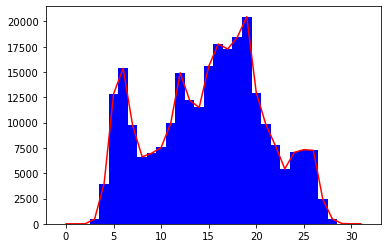

In [40]:
hist1 = hist1.flatten()
plt.plot(hist1, color='r')
binX = np.arange(32)
plt.bar(binX, hist1, width=1, color='b')

In [41]:
hist2 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[256], ranges=[0, 255])

<BarContainer object of 256 artists>

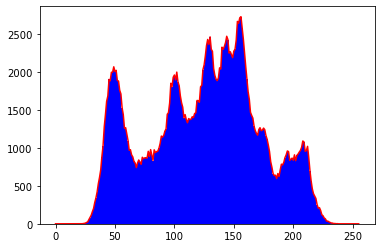

In [43]:
hist2 = hist2.flatten()
plt.plot(hist2, color='r')
binX = np.arange(256)
plt.bar(binX, hist2, width=1, color='b')

* 채널별 히스토그램 분석(lena 이미지)

In [44]:
src = cv2.imread('./data/lena.jpg')

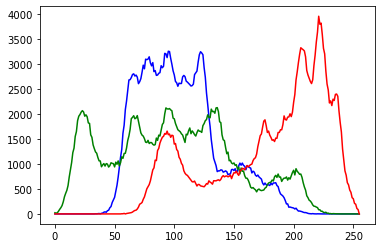

In [45]:
Color = ['b', 'g', 'r']

for i in range(3):
    hist = cv2.calcHist(images=[src], channels=[i], mask=None, histSize=[256], ranges=[0, 255])
    plt.plot(hist, color=Color[i])

* 히스토그램 스트레칭

In [64]:
src = cv2.imread('./data/hawkes.bmp', cv2.IMREAD_GRAYSCALE)

minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(src)
dst = np.uint8((src - minVal) / (maxVal - minVal) * 255)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [65]:
dst.min(), dst.max()

(0, 255)

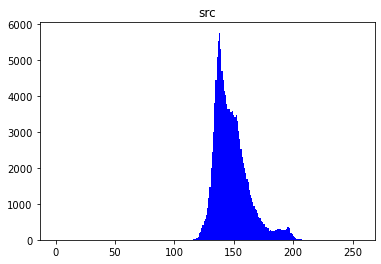

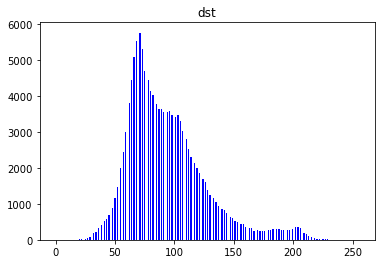

In [72]:
hist1 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
hist2 = cv2.calcHist(images=[dst], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
hist1= hist1.flatten()
hist2= hist2.flatten()

plt.title('src')
binX = np.arange(256)
plt.bar(binX, hist1, width=1, color='b')
plt.show()

plt.title('dst')
binX = np.arange(256)
plt.bar(binX, hist2, width=1, color='b')
plt.show()

* 히스토그램 평활화

In [73]:
src = np.array([[0, 0, 0, 0],
               [1, 1, 3, 5],
               [6, 1, 1, 3],
               [4, 3, 1, 7]], dtype=np.uint8)

dst = cv2.equalizeHist(src)
dst

array([[  0,   0,   0,   0],
       [106, 106, 170, 212],
       [234, 106, 106, 170],
       [191, 170, 106, 255]], dtype=uint8)

* 히스토그램 평활화(hawkes.bmp 이미지)

In [74]:
src = cv2.imread('./data/hawkes.bmp', cv2.IMREAD_GRAYSCALE)

dst = cv2.equalizeHist(src)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

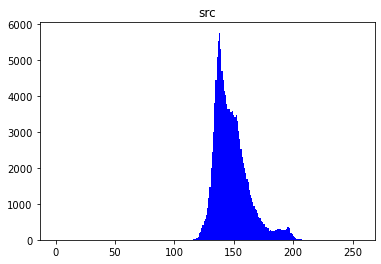

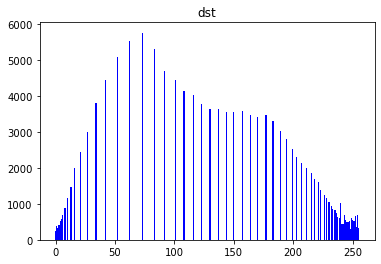

In [75]:
hist1 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
hist2 = cv2.calcHist(images=[dst], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
hist1= hist1.flatten()
hist2= hist2.flatten()

plt.title('src')
binX = np.arange(256)
plt.bar(binX, hist1, width=1, color='b')
plt.show()

plt.title('dst')
binX = np.arange(256)
plt.bar(binX, hist2, width=1, color='b')
plt.show()

* 히스토그램 평활화 (pepper 컬러 이미지)

- 아래와 같이 하면 색상값마다 평활화를 진행하는 것이기 때문에 원본과 색상이 달라짐 -> ycr 사용

In [90]:
src = cv2.imread('./data/pepper.bmp')
dst = np.zeros(src.shape, dtype=np.uint8)

d1 = cv2.equalizeHist(src[:,:,0])
d2 = cv2.equalizeHist(src[:,:,1])
d3 = cv2.equalizeHist(src[:,:,2])
dst = cv2.merge([d1, d2, d3])

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [96]:
src = cv2.imread('./data/pepper.bmp')
YCrCb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(YCrCb)

Ye = cv2.equalizeHist(Y)
dst = cv2.merge([Ye, Cr, Cb])
dst = cv2.cvtColor(dst, cv2.COLOR_YCrCb2BGR)
cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

* 히스토그램 평활화(lena 컬러 이미지)

In [97]:
src = cv2.imread('./data/lena.jpg')
YCrCb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(YCrCb)

Ye = cv2.equalizeHist(Y)
dst = cv2.merge([Ye, Cr, Cb])
dst = cv2.cvtColor(dst, cv2.COLOR_YCrCb2BGR)
cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [98]:
src = cv2.imread('./data/lena.jpg')
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

ve = cv2.equalizeHist(v)
dst = cv2.merge([h, s, ve])
dst = cv2.cvtColor(dst, cv2.COLOR_HSV2BGR)
cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [102]:
src = cv2.imread('./data/lena.jpg')

YCrCb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(YCrCb)
Ye = cv2.equalizeHist(Y)
dst1 = cv2.merge([Ye, Cr, Cb])
dst1 = cv2.cvtColor(dst1, cv2.COLOR_YCrCb2BGR)

hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
ve = cv2.equalizeHist(v)
dst2 = cv2.merge([h, s, ve])
dst2 = cv2.cvtColor(dst2, cv2.COLOR_HSV2BGR)

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

* 히스토그램의 역투영

In [104]:
src = np.array([[0, 0, 0, 0],
               [1, 1, 3, 5],
               [6, 1, 1, 3],
               [4, 3, 1, 7]], dtype=np.uint8)

hist = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[4], ranges=[0, 8])
backP = cv2.calcBackProject([src], [0], hist, [0, 8], scale=1)

array([[9.],
       [3.],
       [2.],
       [2.]], dtype=float32)

In [26]:
src = cv2.imread('./data/fruits.jpg')
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

roi = cv2.selectROI(src)
roi_h = h[roi[1]:roi[1]+roi[3], roi[0]:roi[0]+roi[2]]

hist = cv2.calcHist([roi_h], [0], None, [64], [0, 256])
backP = cv2.calcBackProject([h.astype(np.float32)], [0], hist, [0, 256], scale=1) # uint8은 255

hist = cv2.sort(hist, cv2.SORT_EVERY_COLUMN + cv2.SORT_DESCENDING)
T = hist[1][0]-1

ret, dst = cv2.threshold(backP, T, 255, cv2.THRESH_BINARY) # T보다 크면 255, 작으면 0
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()